In [ ]:
pip install easyocr

In [ ]:
pip install opencv-python

In [ ]:
pip install pytube

In [1]:
import os
os.getcwd()

'd:\\git\\drive_cycle_gen'

In [146]:
import pytube

try:
    os.chdir(r"videos")
except Exception:
    pass
# Download the YouTube video
yt = pytube.YouTube("https://www.youtube.com/watch?v=UspWC05c_sk")  # Replace with your YouTube URL
video = yt.streams.filter(progressive=True, file_extension='mp4').last().download() # Download the highest quality stream

# Use the downloaded video's path in your OpenCV code
video_path = video

In [147]:
video_path

'd:\\git\\drive_cycle_gen\\videos\\AFM 600 Superstock Expert race at Buttonwillow 152 lap time Apr 2022.mp4'

In [148]:
import cv2
# from google.colab.patches import cv2_imshow
# import pytesseract
import easyocr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Video file path
# video_path = '/content/drive/MyDrive/collabfolder/Onboard Valencia - Yamaha R6 - 1,37 - Circuit Ricardo Tormo.mp4'
# Create VideoCapture object
cap = cv2.VideoCapture(video_path)

# Check if the video file opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()


In [78]:
# # Loop through frames
# while cap.isOpened():
#     # Read a frame
#     ret, frame = cap.read()

#     # Check if the frame was read successfully
#     if not ret:
#         break

#     # Display the frame
#     # cv2.imshow('Video Frame', frame)
#     cv2_imshow(frame)

#     # Break the loop if the 'q' key is pressed
#     if cv2.waitKey(25) & 0xFF == ord('q'):
#         break

# # Release video capture object and close all windows
# cap.release()
# cv2.destroyAllWindows()

In [149]:
# Get total number of frames
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

# Get video FPS
fps = cap.get(cv2.CAP_PROP_FPS)

# Calculate total video length in seconds
total_length_in_seconds = total_frames / fps

print("Total video length:", total_length_in_seconds)

Total video length: 701.5682349015683


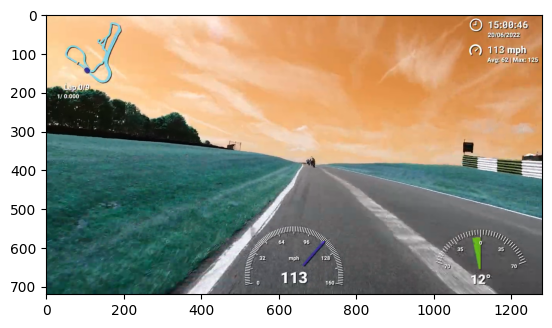

In [99]:
target_second = 150
target_frame = int(cap.get(cv2.CAP_PROP_FPS) * target_second)
cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)
ret, frame = cap.read()
plt.imshow(frame)

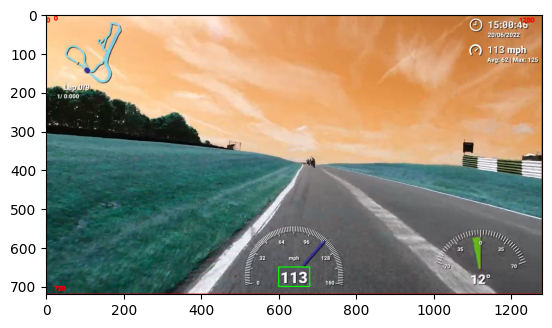

In [100]:
# Define the coordinates of the rectangular selection (x, y, width, height)
# roi_coordinates = (125, 305, 35, 25)  # Modify these values based on your region of interest IOMTT
roi_coordinates = (600, 650, 80, 50)  # Modify these values based on your region of interest

# Create a copy of the frame to preserve the original
frame_copy = frame.copy()

# Draw rulers on all four sides
cv2.line(frame_copy, (0, 0), (frame_copy.shape[1], 0), (255, 0, 0), 2)  # Top ruler
cv2.putText(frame_copy, '0', (0, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
cv2.putText(frame_copy, str(frame_copy.shape[1]), (frame_copy.shape[1] - 60, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

cv2.line(frame_copy, (0, 0), (0, frame_copy.shape[0]), (255, 0, 0), 2)  # Left ruler
cv2.putText(frame_copy, '0', (20, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
cv2.putText(frame_copy, str(frame_copy.shape[0]), (20, frame_copy.shape[0] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

cv2.line(frame_copy, (frame_copy.shape[1], 0), (frame_copy.shape[1], frame_copy.shape[0]), (255, 0, 0), 2)  # Right ruler

cv2.line(frame_copy, (0, frame_copy.shape[0]), (frame_copy.shape[1], frame_copy.shape[0]), (255, 0, 0), 2)  # Bottom ruler

# Draw a rectangle on the copy of the frame
cv2.rectangle(frame_copy, (roi_coordinates[0], roi_coordinates[1]),
              (roi_coordinates[0] + roi_coordinates[2], roi_coordinates[1] + roi_coordinates[3]),
              (0, 255, 0), 2)  # Here, (0, 255, 0) is the color (green), and 2 is the thickness

# Display the frame with the highlighted region
plt.imshow(frame_copy)


In [101]:
# Extract the region of interest (ROI) for OCR
roi_image = frame[roi_coordinates[1]:roi_coordinates[1] + roi_coordinates[3],
                 roi_coordinates[0]:roi_coordinates[0] + roi_coordinates[2]]

In [121]:
# Convert the ROI to grayscale
gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to improve text recognition (optional)
thresh = cv2.threshold(gray_roi, 130, 255, cv2.THRESH_BINARY)[1]

# Apply median filtering for noise reduction
smoothed_roi = cv2.medianBlur(gray_roi, 3)  # Adjust kernel size as needed

# Apply adaptive thresholding for better contrast handling
thresh = cv2.threshold(smoothed_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
# thresh = cv2.adaptiveThreshold(smoothed_roi, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)


# Use pytesseract to extract text, specifying that we only want digits
# ocr_result = pytesseract.image_to_string(thresh, config='--psm 6 tessedit_char_whitelist=0123456789')
reader = easyocr.Reader(['en'])
ocr_result = reader.readtext(thresh,allowlist='0123456789', detail=0)[0] if len(reader.readtext(thresh, detail=0))>0 else np.nan

print("OCR Result for the selected region:")
print(ocr_result)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


OCR Result for the selected region:
113


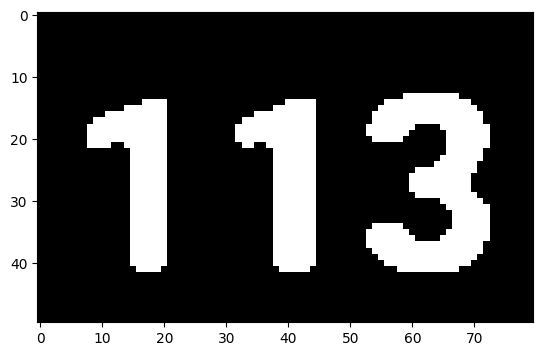

In [122]:
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
# plt.imshow(thresh)

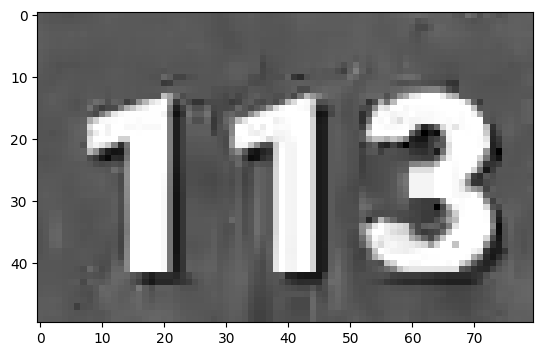

In [93]:
plt.imshow(cv2.cvtColor(gray_roi, cv2.COLOR_BGR2RGB))
# plt.imshow(gray_roi)

In [13]:
# # Get the video's FPS
# fps = cap.get(cv2.CAP_PROP_FPS)
# reader = easyocr.Reader(['en'])

# # Create an empty DataFrame to store the results
# time = []
# ocr = []
# # df = pd.DataFrame(data)

# # Loop through each second of the video
# frame_count = 0
# while True:
#     ret, frame = cap.read()

#     if not ret:
#         break  # End of video

#     # Process the frame every second
#     if frame_count % int(fps) == 0:
#         # Extract the region of interest (ROI)
#         roi_image = frame[roi_coordinates[1]:roi_coordinates[1] + roi_coordinates[3],
#                           roi_coordinates[0]:roi_coordinates[0] + roi_coordinates[2]]

#         # Convert the ROI to grayscale
#         gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)

#         # Apply thresholding (optional)
#         thresh = cv2.threshold(gray_roi, 130, 255, cv2.THRESH_BINARY)[1]
#         cv2_imshow(thresh)

#         # Extract text using OCR
#         # ocr_result = pytesseract.image_to_string(thresh, config='--psm 6 --oem 3 -c tessedit_char_whitelist=0123456789')
#         ocr_result = reader.readtext(thresh, detail=0)[0] if len(reader.readtext(thresh, detail=0))>0 else np.nan

#         print(ocr_result)

#         time.append(frame_count / fps)
#         ocr.append(ocr_result)
#         # Append the time and OCR value to the DataFrame
#         # df = df.append({'Time (seconds)': frame_count / fps, 'OCR Value': ocr_result}, ignore_index=True)

#     frame_count += 1

# # Release the VideoCapture object
# cap.release()

# # Print the DataFrame
# # print(df.to_string())

0.0 0
1.0 0
2.0 0
3.0 0
4.0 nan
5.0 nan
6.0 nan
7.0 4
8.0 8
9.0 12
10.0 16
11.0 15
12.0 13
13.0 11
14.0 nan
15.0 5
16.0 3
17.0 nan
18.0 nan
19.0 5
20.0 9
21.0 nan
22.0 12
23.0 12
24.0 12
25.0 13
26.0 13
27.0 13
28.0 12
29.0 12
30.0 11
31.0 9
32.0 8
33.0 8
34.0 10
35.0 10
36.0 4
37.0 8
38.0 nan
39.0 7
40.0 6
41.0 3
42.0 0
43.0 nan
44.0 nan
45.0 0
46.0 0
47.0 0
48.0 nan
49.0 0
50.0 nan
51.0 nan
52.0 nan
53.0 nan
54.0 nan
55.0 nan
56.0 nan
57.0 nan
58.0 0
59.0 0
60.0 nan
61.0 nan
62.0 nan
63.0 nan
64.0 nan
65.0 0
66.0 nan
67.0 nan
68.0 nan
69.0 nan
70.0 nan
71.0 nan
72.0 nan
73.0 0
74.0 nan
75.0 0
76.0 0
77.0 0
78.0 0
79.0 0
80.0 0
81.0 0
82.0 0
83.0 0
84.0 0
85.0 0
86.0 nan
87.0 nan
88.0 nan
89.0 nan
90.0 3
91.0 3
92.0 12
93.0 16
94.0 2
95.0 25
96.0 33
97.0 38
98.0 43
99.0 49
100.0 46
101.0 44
102.0 47
103.0 53
104.0 55
105.0 52
106.0 44
107.0 37
108.0 31
109.0 27
110.0 33
111.0 45
112.0 54
113.0 51
114.0 44
115.0 43
116.0 48
117.0 51
118.0 57
119.0 74
120.0 86
121.0 94
122.0 102
123.0 1

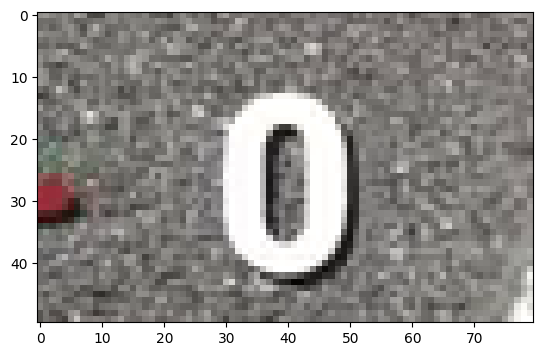

In [133]:
time = []
ocr = []
# thresh_images = []

# Get total number of frames
total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
# Get video FPS
fps = cap.get(cv2.CAP_PROP_FPS)
# Calculate total video length in seconds
total_length = total_frames / fps
# print("Total video length:", total_length_in_seconds)

for ts in np.arange(total_length):
  target_frame = int(cap.get(cv2.CAP_PROP_FPS) * ts)
  cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame)
  ret, frame = cap.read()
  roi_image = frame[roi_coordinates[1]:roi_coordinates[1] + roi_coordinates[3],
                  roi_coordinates[0]:roi_coordinates[0] + roi_coordinates[2]]

  # Convert the ROI to grayscale
  # gray_roi = cv2.cvtColor(roi_image, cv2.COLOR_BGR2GRAY)

  # Apply thresholding to improve text recognition (optional)
  # thresh = cv2.threshold(gray_roi, 130, 255, cv2.THRESH_BINARY)[1]

  # Apply median filtering for noise reduction
  # smoothed_roi = cv2.medianBlur(gray_roi, 3)  # Adjust kernel size as needed

  # Apply adaptive thresholding for better contrast handling
  # thresh = cv2.threshold(smoothed_roi, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

  # thresh = cv2.adaptiveThreshold(smoothed_roi, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

  thresh = roi_image

  # cv2_imshow(thresh)
  plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))


  ocr_result = reader.readtext(thresh,allowlist='0123456789', detail=0)[0] if len(reader.readtext(thresh, detail=0))>0 else np.nan

  time.append(ts)
  ocr.append(ocr_result)
  # thresh_images.append(thresh_image_pil)

  print(ts,ocr_result)
  # display(thresh_image_pil)

In [134]:
max(time)

1240.0

In [135]:
df = pd.DataFrame()
df['time_s'] = time
df['speed_kmph'] = ocr
# df['images'] = thresh_images

In [136]:
# df8 = pd.DataFrame()
# df8['time_s'] = time
# df8['speed_kmph'] = ocr
# # df['images'] = thresh_images

In [137]:
# df_speed = pd.DataFrame()
# df_speed['org_speed']=df['speed_kmph'].astype(float)
# df_speed['chg_speed']=df8['speed_kmph'].astype(float)


In [138]:
df['speed_kmph'] = df['speed_kmph'].astype(float)

In [139]:
# # Custom function to create the new column based on conditions
# def combine_columns(row):
#     if '8' in str(row['chg_speed']):
#         return str(row['chg_speed'])
#     else:
#         return str(row['org_speed'])

# # Apply the custom function to create the new column
# df_speed['combined_column'] = df_speed.apply(combine_columns, axis=1)

In [140]:
# df['time_s'] = time
# df['speed_mph'] = df_speed['combined_column'].astype(float)

In [141]:
df

,time_s,speed_kmph
0,0.0,0.0
1,1.0,0.0
2,2.0,0.0
3,3.0,0.0
4,4.0,NaN
...,...,...
1236,1236.0,NaN
1237,1237.0,0.0
1238,1238.0,0.0
1239,1239.0,0.0


In [142]:
df.dtypes

time_s        float64
speed_kmph    float64
dtype: object

<Axes: >

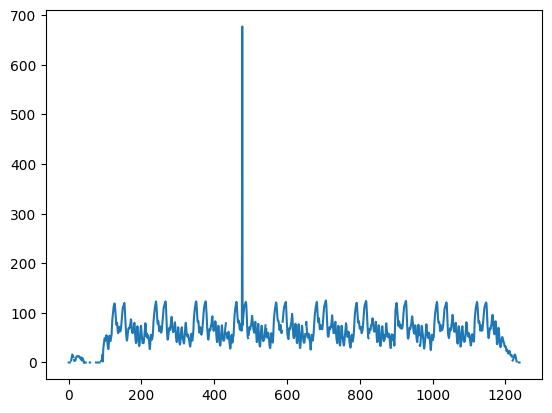

In [143]:
df['speed_kmph'].plot()

In [144]:
df.to_csv('Cadwell_Park.csv', index=False)